In [1]:
from pathlib import Path

DATASET_DIR = Path("../data/raw/knee-osteoarthritis-dataset-with-severity")

print("Dataset exists:", DATASET_DIR.exists())
print("Subfolders found:")
for p in DATASET_DIR.iterdir():
    print(" -", p.name)


Dataset exists: True
Subfolders found:
 - auto_test
 - test
 - train
 - val


In [2]:
def count_images_per_class(split_dir):
    counts = {}
    for class_dir in sorted(split_dir.iterdir()):
        if class_dir.is_dir():
            counts[class_dir.name] = len(list(class_dir.glob("*.png")))
    return counts


for split in ["train", "val", "test"]:
    split_path = DATASET_DIR / split
    print(f"\n{split.upper()} SET")
    counts = count_images_per_class(split_path)
    for k, v in counts.items():
        print(f"  KL {k}: {v} images")


TRAIN SET
  KL 0: 2286 images
  KL 1: 1046 images
  KL 2: 1516 images
  KL 3: 757 images
  KL 4: 173 images

VAL SET
  KL 0: 328 images
  KL 1: 153 images
  KL 2: 212 images
  KL 3: 106 images
  KL 4: 27 images

TEST SET
  KL 0: 639 images
  KL 1: 296 images
  KL 2: 447 images
  KL 3: 223 images
  KL 4: 51 images


In [3]:
pip install matplotlib pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Reeve\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


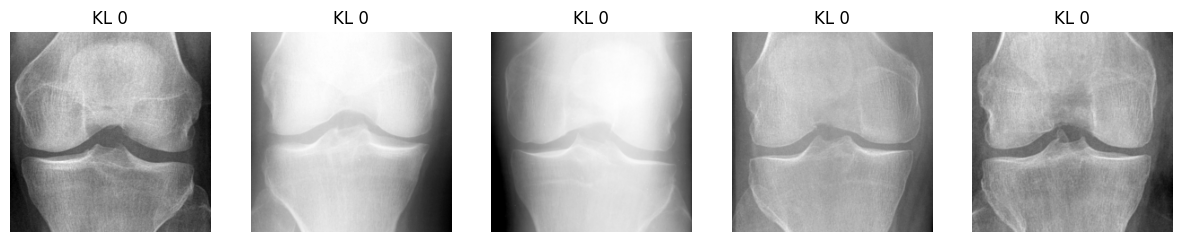

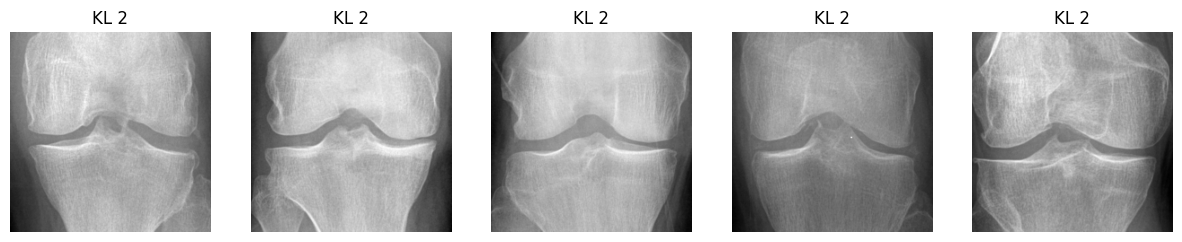

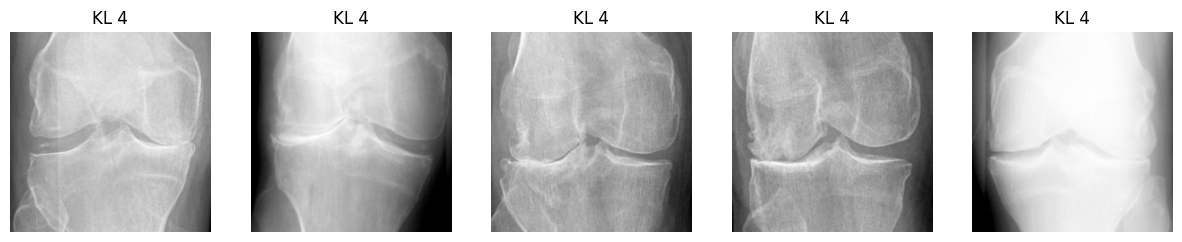

In [5]:
import random
import matplotlib.pyplot as plt
from PIL import Image

def show_samples(split="train", class_label="0", n=5):
    img_dir = DATASET_DIR / split / class_label
    images = list(img_dir.glob("*.png"))
    samples = random.sample(images, min(n, len(images)))

    plt.figure(figsize=(15, 3))
    for i, img_path in enumerate(samples):
        plt.subplot(1, n, i + 1)
        img = Image.open(img_path)
        plt.imshow(img, cmap="gray")
        plt.title(f"KL {class_label}")
        plt.axis("off")
    plt.show()

for kl in ["0", "2", "4"]:
    show_samples(split="train", class_label=kl, n=5)